# Práctica IV
## Solución a sistemas de ecuaciones no lineales
### Ceros de funciones
###### Integrantes: 
- López Espíndola Luis Enrique

- Mucio Alvarez Santos

- Muñiz Lescale Marco Aurelio

- Reynoso Sánchez Arturo Yitzack

# Ejercicios computacionales

In [ ]:
# Funciones auxiliares y módulos requeridos.
import numpy as np
from typing import Callable  # Para el método de Regla Falsa
import math

# Se usa en el algoritmo de Factorización LU
class sslException(Exception):
    
    def __init__(self,valor):
        self.valor = str(valor)
        
    def __str__(self):
        errores = {"0":"Las dimensiones son diferentes. La matriz debe ser cuadrada.",
                  "1":"Los elementos de la diagonal son cero. La matriz no es invertible.",
                  "2":"Los elementos de la diagonal son cero.",
                  "3":"Los elementos de la diagonal deben ser positivos."}
        if self.valor in errores:
            return f"Error {self.valor}. {errores[self.valor]}"
        else:
            return "Error no clasificado"


## Solvers for linear equations
# Sistema triangular inferior
def STI(L,rhs):
    m,n = L.shape
    if m != n:
        raise sslException(0)
    b = rhs.copy()
    x = np.empty((n,),dtype = "float64")
    for j in range(n):
        if L[j,j] == 0:
             raise sslException(1)
        x[j] = b[j]/L[j,j]
        for i in range(j+1,n):
            b[i] = b[i] - L[i,j]*x[j]
    return x

# Sistema triangular superior
def STS(U,rhs):
    m,n = U.shape
    if m != n:
        raise sslException(0)
    b = rhs.copy()
    x = np.zeros(b.shape,dtype = "float64")
    for j in reversed(range(n)):
        if U[j,j] == 0:
            raise sslException(1)
        else:
            x[j] = b[j]/U[j,j]
            for i in range(j):
                b[i] = b[i] - U[i,j]*x[j]
    return x

# Factorización LU sin pivoteo
def lu(M):    
    m,n = M.shape
    if m != n:
        raise sslException(0)
    U,L = M.copy(),np.eye(n)
    for j in range(n-1):
        if U[j,j] == 0:
            raise sslException(2)        
        for k in range(j+1,n):
            L[k,j] = U[k,j]/U[j,j]
            for i in range(j+1,n):
                U[k,i] = U[k,i] - L[k,j]*U[j,i]
        U[j+1:,j] = 0
    return L,U



# <FONT COLOR="blue">Ejercicio 1</FONT>
 Programar métodos de 

a) Bisección.

b) Secante.

c) Newton.

d) Regla Falsa.

Para cada caso, pedir los datos entrada correspondientes: función punto(s) inicial(es), tolerancia, etc. Devolver la raíz si la encuentra, si no desplegar el mensaje donde se diga qu ́e ocurrió. Entregar
los códigos de cada método.

#### a) Bisección

In [ ]:
# Bisección
import numpy as np
def biseccion(f,Tol,N,a,b):
  '''Esta funcion implementa el metodo de la biseccion
  para encontrar la raiz de una funcion.
  f:   funcion de la cual se busca la raiz
  Tol: tolerancia del error numerico
  N:   numero maximo de iteraciones
  a:   limite inferior del rango inicial
  b:   limite superior del rango inicial
  '''
  # Se estable los puntos iniciales
  fa, fb = f(a), f(b)
  #no hay un cambio de signo (teorema del valor medio)
  #no existe raiz en el intervalo [a,b]
  if fa*fb>0:
    print ("no hay raiz en [a,b]")
    return
  #contador de iteraciones    
  n=1
  x0=0.0
  #mientras no se exceda el numero de iteraciones
  while n<=N:
    #se busca la raiz en el punto medio
    x1=(a+b)/2.0
    fx=f(x1)
    #en caso de que la iteracion siguiente y la diferencia
    #entre la iteracion anterior no excedan Tol, entonces
    #la iteracion actual se aproxima a la solucion buscada
    if abs(f(x1)) <= Tol and abs(x1-x0) <= Tol:
      return x1
    #en caso de no cumplir el criterio de tolerancia
    #se actualiza el rango de busqueda
    if (fa*fx <0.0):
      b=x1 
    if (fx*fa >0.0):      
      a=x1
    x0=x1
    #se incrementa el contador de iteraciones
    n=n+1


def f(x):
  return (x**2)-1

raiz = biseccion(f,0.001,1000,-0.5,2)
print("La raíz con el método de la bisección es:", raiz)

La raíz con el método de la bisección es: 0.9996337890625


#### B) Secante

In [ ]:
def secante(f,x0,x1,tol = 1e-8, maxiter = 500):
    """Busca un cero de la funcion f mediante el metodo de la secante
    - Entrada >
      f (function)    - Funcion de la cual se quiere conocer su raiz.
      x0 (float)      - Primera aproximación.
      x1 (float)      - Segunda aproximación.
      tol (float)     - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      maxiter (float) - Opcional. Numero maximo de iteraciones.
    
    - Salida >
      cero (float) - Valor aproximado de un cero .
      it (int)     - Número de iteraciones que le toma al metodo encontrar un cero.
    """
    it = 0
    while abs(x0 - x1) > tol and it < maxiter:
        try:
            x0,x1 = x1,x0 - f(x0)*(x1-x0)/(f(x1)-f(x0))
        except ZeroDivisionError:
            print('La recta secante no tiene interseccion con el eje x')
            return None
        it += 1
    return x1,it

#### C) Newton

In [ ]:
def newton(f,x,tol = 1e-8, maxiter = 500):
    """Busca un cero de la funcion f mediante el metodo de Newton
    - Entrada >
      f (function)    - Funcion de la cual se quiere conocer su raiz.
      x (float)       - Punto inicial.
      tol (float)     - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      maxiter (float) - Opcional. Numero maximo de iteraciones.
    
    - Salida >
      cero (float) - Valor aproximado de un cero .
      it (int)     - Número de iteraciones que le toma al metodo encontrar un cero.
    """
    it,h = 0,1
    # Se calcula el cero mediante Newton
    while abs(h) > tol and it < maxiter:
        try:
            h = f(x)/derivada(f,x)
        except ZeroDivisionError:
            print(f'La derivada de la función en {x} es cero')
            return None
        cero = x - h
        x = cero
        it += 1
    return cero,it

In [ ]:
## Derivada numerica
def derivada(f, x, tol):
    return (f(x+tol)-f(x))/(tol)

def newton(f,x,tol = 1e-5, maxiter = 500):
    """Busca un cero de la funcion f mediante el metodo de Newton
    - Entrada >
      f (function)    - Funcion de la cual se quiere conocer su raiz.
      x (float)       - Punto inicial.
      tol (float)     - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      maxiter (float) - Opcional. Numero maximo de iteraciones.
    
    - Salida >
      cero (float) - Valor aproximado de un cero .
      it (int)     - Número de iteraciones que le toma al metodo encontrar un cero.
    """
    it,h = 0,1
    # Se calcula el cero mediante Newton
    while abs(h) > tol and it < maxiter:
        try:
            h = f(x)/derivada(f,x,tol)
        except ZeroDivisionError:
            print(f'La derivada de la función en {x} es cero')
            return None
        cero = x - h
        x = cero
        it += 1
    return cero,it

#### d) Regla Falsa

In [ ]:
import math
from typing import Callable

def regla_falsa(f:Callable[[float], float], a:float, b:float, tolerancia:float) -> float:
  """
  Regresa una raíz de la función (si es que existe) contenido en [a, b] por el 
  método de la regla falsa o lanza un error.

  Argumentos:
  f -- la función a obtener el cero. 
  a -- el primer punto inicial.
  b -- el segundo punto inicial.
  tolerancia -- la tolerancia de la función.

  Regresa:
  La raíz de la función, o error si no la encuentra.
  
  """
  iteracion = 1
  if (f(a)*f(b)> 0):
    print("Error: Puntos iniciales incorrectos. Las imágenes debe  tener signos diferentes.")
    return 
  condicion = True

  while (condicion):
    c = (a*f(b) - b*f(a))/(f(b) - f(a)) 
    print('Iteración %d, x2 = %0.6f and f(c) = %0.6f' % (iteracion, c, f(c)))
    if (f(a)*f(c) < 0):
      b = c
    else:
      a = c
    iteracion +=1
    condicion = abs(f(c)) > tolerancia
  return c

# <FONT COLOR="blue">Ejercicio 2</FONT>
Usar el Método de Bisección (programado) para encontrar la solución de las siguientes funciones con una tolerancia de $10^{-5}$.

a) $f(x) = x-2^{-x}$, para $0\leq x\leq 1$

b) $f(x) = e^x-x^2+3x-2$, para $0\leq x\leq 1$

c) $f(x) = 2xcos(2x)-(x + 1)^2$, para $-3\leq x\leq -2$ y $-1\leq x\leq 0$

d) $f(x) = xcos(x)-2x^2+3x-1$, para $0.2\leq x\leq 0.3$ y $1.2\leq x\leq 1.3$

In [ ]:
# Método de Bisección
def biseccion(f,a,b,tol = 1e-5, maxiter = 500): # tolerancia de 10^-5
    """Busca un cero de la funcion f mediante el metodo de biseccion en el intervalo (a,b).
    - Entrada >
      f (function)    - Funcion de la cual se quiere conocer su raiz.
      a (float)       - Extremo inferior del intervalo.
      b (float)       - Extremo superior del intervalo.
      tol (float)     - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      maxiter (float) - Opcional. Numero maximo de iteraciones.
    - Salida >
      cero (float) - Valor aproximado de un cero .
      it (int)     - Número de iteraciones que le toma al metodo encontrar un cero.
    """
    it = 0
    while abs(b-a) > tol and it < maxiter:
        it += 1
        m = (b+a)/2
        if f(b)*f(m) <= 0:
            a = m
        else:
            b = m
    return m,it

In [ ]:
import numpy as np
from IPython.display import display, Latex

f1 = lambda x:x-2**(-x)
display(Latex(f'$f_1(x) = x-2^{{-x}}$'))
x,i = biseccion(f1,0,1)
print(f'Un cero de la función f1 para x en [0,1] es {round(x,4)}, ya que f({round(x,4)}) = {round(f1(x),4)}. El método necesitó {i} iteraciones')

print("\n")
f2 = lambda x:np.exp(x)-x**2+3*x-2
display(Latex(f'$f_2(x) = e^x-x^2+3x-2$'))
x,i = biseccion(f2,0,1)
print(f'Un cero de la función f2 para x en [0,1] es {round(x,4)}, ya que f({round(x,4)}) = {round(f2(x),4)}. El método necesitó {i} iteraciones')

print("\n")
f3 = lambda x:2*x*np.cos(2*x)-(x+1)**2
display(Latex(f'$f_3(x) = 2xcos(2x)-(x + 1)^2$'))
x,i = biseccion(f3,-3,-2)
print(f'Un cero de la función f3 para x en [-3,-2] es {round(x,4)}, ya que f({round(x,4)}) = {round(f3(x),4)}. El método necesitó {i} iteraciones')
x,i = biseccion(f3,-1,0)
print(f'Un cero de la función f3 para x en [-1,0] es {round(x,4)}, ya que f({round(x,4)}) = {round(f3(x),4)}. El método necesitó {i} iteraciones')

print("\n")
f4 = lambda x:x*np.cos(x)-2*x**2+3*x-1
display(Latex(f'$f_4(x) = xcos(x)-2x^2+3x-1$'))
x,i = biseccion(f4,0.2,0.3)
print(f'Un cero de la función f4 para x en [0.2,0.3] es {round(x,4)}, ya que f({round(x,4)}) = {round(f4(x),4)}. El método necesitó {i} iteraciones')
x,i = biseccion(f4,1.2,1.3)
print(f'Un cero de la función f4 para x en [1.2,1.3] es {round(x,4)}, ya que f({round(x,4)}) = {round(f4(x),4)}. El método necesitó {i} iteraciones')

<IPython.core.display.Latex object>

Un cero de la función f1 para x en [0,1] es 0.6412, ya que f(0.6412) = -0.0. El método necesitó 17 iteraciones




<IPython.core.display.Latex object>

Un cero de la función f2 para x en [0,1] es 0.2575, ya que f(0.2575) = -0.0. El método necesitó 17 iteraciones




<IPython.core.display.Latex object>

Un cero de la función f3 para x en [-3,-2] es -2.1913, ya que f(-2.1913) = 0.0. El método necesitó 17 iteraciones
Un cero de la función f3 para x en [-1,0] es -0.7982, ya que f(-0.7982) = 0.0. El método necesitó 17 iteraciones




<IPython.core.display.Latex object>

Un cero de la función f4 para x en [0.2,0.3] es 0.2975, ya que f(0.2975) = -0.0. El método necesitó 14 iteraciones
Un cero de la función f4 para x en [1.2,1.3] es 1.2566, ya que f(1.2566) = 0.0. El método necesitó 14 iteraciones


# <FONT COLOR="blue">Ejercicio 4</FONT>
#### B)
Notemos que para este ejercico la toleracia es de $10^{-4}$ y la funcion de este caso es: $$f(x) = x^2-3$$
Procedemos a aplicar el algoritmo 

In [ ]:
def biseccion(f,a,b,tol = 1e-8, maxiter = 500):
    """Busca un cero de la funcion f mediante el metodo de biseccion en el intervalo (a,b).
    - Entrada >
      f (function)    - Funcion de la cual se quiere conocer su raiz.
      a (float)       - Extremo inferior del intervalo.
      b (float)       - Extremo superior del intervalo.
      tol (float)     - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      maxiter (float) - Opcional. Numero maximo de iteraciones.
    
    - Salida >
      cero (float) - Valor aproximado de un cero .
      it (int)     - Número de iteraciones que le toma al metodo encontrar un cero.
    """
    it = 0
    while abs(b-a) > tol and it < maxiter:
        it += 1
        m = (b+a)/2
        if f(b)*f(m) <= 0:
            a = m
        else:
            b = m
    return m,it

# Utilizando las funciones mencionada anteriormente 
func_ej_4 = lambda x:x**2-3
x,i = biseccion(func_ej_4,-1,3)
print(f'Un cero de la función f1 es {x:2.4e} ya que f({x:2.4e}) = {func_ej_4(x):2.4e}')
print(f'El método necesito {i} iteraciones')

Un cero de la función f1 es 1.7321e+00 ya que f(1.7321e+00) = 2.1358e-08
El método necesito 29 iteraciones


# Ejercicio 9

In [ ]:
def puntofijo(f,x,tol = 1e-5, maxiter = 500):
    er=100
    i=0
    while(i<=maxiter and er>=tol):
        temp=x
        x=f(x)
        er=abs((x-temp))
        print("%d\t\t%.4f\t\t%.4f"%(i,x,er));
        i+=1;

    print("\nLa solucion mas aproximada es: %.4f con un error de %.4f"%(x,er));

In [ ]:
def fpp(x):
  return np.pi+0.5*math.sin(x/2)

0		3.6416		0.5000
1		3.6260		0.0155
2		3.6270		0.0009

La solucion mas aproximada es: 3.6270 con un error de 0.0009


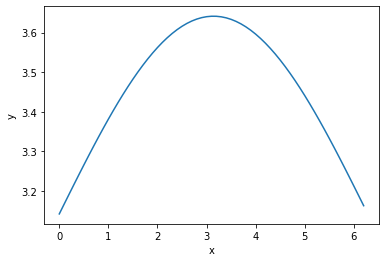

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
puntofijo(fpp,np.pi,tol = 1e-2, maxiter = 500)

x = np.arange(0,2*np.pi,0.1)
y = np.pi+0.5*np.sin(x/2)

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# <FONT COLOR="blue">Ejercicio 13</FONT>
Usar Newton para hallar la solución de las siguientes funciones con una tolerancia de $10^{-5}$

a) $f(x)=e^x+2^{-x}+2\cos(x)-6=0$ para $1\leq x\leq 2$

In [ ]:
def f1(x):
  return np.e**x + 2**(-x)+2*math.cos(x)-6

newton(f1,1.5)

(1.829383601933963, 5)

b) $f(x)=\ln(x-1)+\cos(x-1)=0$ para $1.3\leq x \leq 2$

In [ ]:
def f2(x):
  return np.log(x-1) + math.cos(x-1)

newton(f2,1.5)

(1.3977484759687708, 4)

c) $f(x)=2x \cos(2x)-(x-2)^2=0$ para $2\leq x \leq 3$ y $3\leq x \leq 4$

In [ ]:
def f3(x):
  return 2*x*math.cos(2*x)-(x-2)**2

newton(f3,2.5)
newton(f3,3.5)

(3.7221127731244597, 4)

d) $f(x)=(x-2)^2-\ln(x)=0$ para $1\leq x \leq 2$ y $e\leq x \leq 4$

In [ ]:
def f4(x):
  return (x-2)**2-np.log(x)

newton(f3,1.5)

(3.722112773106569, 57)

In [ ]:
newton(f3,3)

(2.3706869176622742, 6)

e) $f(x)=e^x-3x^2=0$ para $0\leq x \leq 1$ y $3\leq x \leq 5$

In [ ]:
def f5(x):
  return np.e**x-3*x**2

newton(f3,1.5)

(3.722112773106569, 57)

In [ ]:
newton(f3,3.5)

(3.7221127731244597, 4)

f) $f(x)=\sin(x)-e^{-x}=0$ para $0\leq x \leq 1$, $3\leq x \leq 4$ y $6\leq x \leq 7$

In [ ]:
def f5(x):
  return math.sin(x)-e**(-x)

newton(f3,0.5)

(3.7221127731019634, 25)

In [ ]:
newton(f3,3.5)

(3.7221127731244597, 4)

In [ ]:
newton(f3,6.5)

(6.305037932149481, 500)

# <FONT COLOR="blue">Ejercicio 14</FONT>
Calcular las raíces del ejercicio 13 con el método de Secante.

In [ ]:
def fa(x):
  if (x < 1 or x > 2):
    print ("x debe ser mayor o igual a 1 y menor o igual a 2")
    return
  return math.exp(x) + 2**(-x) + 2*math.cos(x) - 6

def fb(x):
  if (x < 1.3 or x > 2):
    print("x debe ser mayor o igual a 1.3 y menor o igual a 2")
    return
  return math.log(x-1) + math.cos(x-1) 

def fc(x):
  if (x < 2 or x > 4):
    print("x debe ser mayor o igual a 2 y menor o igual a 4")
    return
  return 2*x*math.cos(2*x) - (x - 2)**2

def fd(x):
  if (x < 1 or (2 < x and x < math.e) or 4 < x):
    print("x debe estar en el intervalo [1, 2] o en el intervalo [e, 4]")
    return
  return ((x - 2)**2) - math.log(x)

def fe(x):
  if (x < 0 or (1 < x and x < 3) or 5 < x):
    print("x debe estar en el intervalo [0, 1] o en el intervalo [3, 5]")
    return
  return (math.exp(x) - 3*(x**2))

def ff(x):
  if (x < 0 or (1 < x and x < 3) or (4 < x and x < 6) or 7 < x):
    print("x debe estar en el intervalo [0, 1] o [3, 4] o [6,7]")
    return
  return math.sin(x) - math.exp(x)**(-x)

print(f"La raíz de la función fa en el intervalo [1, 2] es x*= {secante(fa,1.8,1.9,1e-5, 500)[0]} después de {secante(fa,1.8,1.9,1e-5, 500)[1]} iteraciones, con  puntos inciales x_0 = 1.8 y x_1 = 1.9")
print(f"La raíz de la función fb en el intervalo [1.3, 2] es x*= {secante(fb,1.5,1.6,1e-5, 500)[0]} después de {secante(fb,1.5,1.6,1e-5, 500)[1]} iteraciones, con puntos iniciales x_0 = 1.5 y x_1 = 1.6")
print(f"La raíz de la función fc en el intervalo [2, 3] es x*= {secante(fc,2.1,2.3,1e-5, 500)[0]} después de {secante(fc,2.1,2.3,1e-5, 500)[1]} iteraciones, con puntos iniciales x_0 = 2.1 y x_1 = 2.3")
print(f"La raíz de la función fc en el intervalo [3, 4] es x*= {secante(fc,3.5,3.6,1e-5, 500)[0]} después de {secante(fc,3.5,3.6,1e-5, 500)[1]} iteraciones, con puntos iniciales x_0 = 3.5 y x_1 = 3.6")
print(f"La raíz de la función fd en el intervalo [1, 2] es x*= {secante(fd,1.3,1.4,1e-5, 500)[0]} después de {secante(fd,1.3,1.4,1e-5, 500)[1]} iteraciones, con puntos iniciales x_0 = 1.3 y x_1 = 1.4")
print(f"La raíz de la función fd en el intervalo [e, 4] es x*= {secante(fd,3.1,3.6,1e-5, 500)[0]} después de {secante(fd,3.1,3.6,1e-5, 500)[1]} iteraciones, con puntos iniciales x_0 = 3.1 y x_1 = 3.6")
print(f"La raíz de la función fe en el intervalo [3, 5] es x*= {secante(fe,4,4.5,1e-5, 500)[0]} después de {secante(fe,4,4.5,1e-5, 500)[1]} iteraciones, con puntos iniciales x_0 = 4 y x_1 = 4.5")
print(f"La raíz de la función fe en el intervalo [0, 1] es x*= {secante(fe,0.6,0.7,1e-5, 500)[0]} después de {secante(fe,0.6,0.7,1e-5, 500)[1]} iteraciones, con puntos iniciales x_0 = 0.6 y x_1 = 0.7")
print(f"La raíz de la función ff en el intervalo [0, 1] es x*= {secante(ff,0.6,0.7,1e-5, 500)[0]} después de {secante(ff,0.6,0.7,1e-5, 500)[1]} iteraciones, con puntos iniciales x_0 = 0.6 y x_1 = 0.7")
print(f"La raíz de la función ff en el intervalo [3, 4] es x*= {secante(ff,3.2,3.3,1e-5, 500)[0]} después de {secante(ff,3.2,3.3,1e-5, 500)[1]} iteraciones, con puntos iniciales x_0 = 3.2 y x_1 = 3.3")
print(f"La raíz de la función ff en el intervalo [6, 7] es x*= {secante(ff,6.3,6.6,1e-5, 500)[0]} después de {secante(ff,6.3,6.6,1e-5, 500)[1]} iteraciones, con puntos iniciales x_0 = 6.3 y x_1 = 6.6")

La raíz de la función fa en el intervalo [1, 2] es x*= 1.8293836019223229 después de 4 iteraciones, con  puntos inciales x_0 = 1.8 y x_1 = 1.9
La raíz de la función fb en el intervalo [1.3, 2] es x*= 1.397748475960274 después de 6 iteraciones, con puntos iniciales x_0 = 1.5 y x_1 = 1.6
La raíz de la función fc en el intervalo [2, 3] es x*= 2.3706869177690146 después de 4 iteraciones, con puntos iniciales x_0 = 2.1 y x_1 = 2.3
La raíz de la función fc en el intervalo [3, 4] es x*= 3.722112773099417 después de 5 iteraciones, con puntos iniciales x_0 = 3.5 y x_1 = 3.6
La raíz de la función fd en el intervalo [1, 2] es x*= 1.4123911679764838 después de 3 iteraciones, con puntos iniciales x_0 = 1.3 y x_1 = 1.4
La raíz de la función fd en el intervalo [e, 4] es x*= 3.057103549994917 después de 5 iteraciones, con puntos iniciales x_0 = 3.1 y x_1 = 3.6
La raíz de la función fe en el intervalo [3, 5] es x*= 3.733079029089154 después de 6 iteraciones, con puntos iniciales x_0 = 4 y x_1 = 4.5
La 

# <FONT COLOR="blue">Ejercicio 15</FONT>
Calcular las raices del ejercicio 13 con el metodo de Regla Falsa.

In [ ]:
# Definicion de las funciones 

def func_1(x):
    return (math.exp(x) + 2**(-x) + 2*math.cos(math.radians(x))- 6)
def func_2(x):
    return (math.log(x-1) + math.cos(math.radians(x-1)))
def func_3(x):
    return (2*x*math.cos(math.radians((2*x))) - (x-2)**2)
def func_4(x):
    return ((x-2)**2 - math.log(x))
def func_5(x): 
    return (math.exp(x) - 3*(x**2))
def func_6(x):
    return (math.sin(math.radians(x)) - math.exp(-x))



a)  $f(x)=e^x+2^{-x}+2\cos(x)-6=0$ para $1\leq x\leq 2$

In [ ]:
# Funcion a)
y = regla_falsa(func_1, 1, 2, .00001)
print(f'Un cero de la función funcion a es {y:2.4e} ya que f({y:2.4e}) = {func_1(y):2.4e}')

Iteración 1, x2 = 1.176934 and f(c) = -0.313720
Iteración 2, x2 = 1.242278 and f(c) = -0.114270
Iteración 3, x2 = 1.265355 and f(c) = -0.040141
Iteración 4, x2 = 1.273373 and f(c) = -0.013921
Iteración 5, x2 = 1.276142 and f(c) = -0.004806
Iteración 6, x2 = 1.277097 and f(c) = -0.001657
Iteración 7, x2 = 1.277426 and f(c) = -0.000571
Iteración 8, x2 = 1.277540 and f(c) = -0.000197
Iteración 9, x2 = 1.277579 and f(c) = -0.000068
Iteración 10, x2 = 1.277592 and f(c) = -0.000023
Iteración 11, x2 = 1.277597 and f(c) = -0.000008
Un cero de la función funcion a es 1.2776e+00 ya que f(1.2776e+00) = -8.0329e-06


b) $f(x)=\ln(x-1)+\cos(x-1)=0$ para $1.3\leq x \leq 2$

In [ ]:
# Funcion b)
print("Para la funcion b) en el intervalo [1.3,2], tenemos:\n")
y = regla_falsa(func_2, 1.3, 2, .00001)
print(f'Un cero de la función funcion b es {y:2.4e} ya que f({y:2.4e}) = {func_2(y):2.4e}')

Para la funcion b) en el intervalo [1.3,2], tenemos:

Iteración 1, x2 = 1.418613 and f(c) = 0.129165
Iteración 2, x2 = 1.372626 and f(c) = 0.012799
Iteración 3, x2 = 1.368338 and f(c) = 0.001226
Iteración 4, x2 = 1.367930 and f(c) = 0.000117
Iteración 5, x2 = 1.367891 and f(c) = 0.000011
Iteración 6, x2 = 1.367887 and f(c) = 0.000001
Un cero de la función funcion b es 1.3679e+00 ya que f(1.3679e+00) = 1.0649e-06


c) $f(x)=2x \cos(2x)-(x-2)^2=0$ para $2\leq x \leq 3$ y $3\leq x \leq 4$

In [ ]:
# Funcion c)
print("Para la funcion c) tenemos: \n\nPara el intervalo [2,3]")
# Intervalo [2,3]
y = regla_falsa(func_3, 2, 3, .00001)
try:
    print(f'Un cero de la función funcion c es {y:2.4e} ya que f({y:2.4e}) = {func_3(y):2.4e}')
except:
    print("Revisa el intervalo")
    
# Intervalo [3,4]
print("Para el intervalo [3,4]")
y = regla_falsa(func_3, 3, 4, .00001)
try:
    print(f'Un cero de la función funcion c es {y:2.4e} ya que f({y:2.4e}) = {func_3(y):2.4e}')
except:
    print("Revisa el intervalo")

Para la funcion c) tenemos: 

Para el intervalo [2,3]
Error: Puntos iniciales incorrectos. Las imágenes debe  tener signos diferentes.
Revisa el intervalo
Para el intervalo [3,4]
Error: Puntos iniciales incorrectos. Las imágenes debe  tener signos diferentes.
Revisa el intervalo


d) $f(x)=(x-2)^2-\ln(x)=0$ para $1\leq x \leq 2$ y $e\leq x \leq 4$

In [ ]:
# Funcion d)
# Intervalo [1,2]
print("Para la funcion d) tenemos: \n\n Para el intervalo [1,2]")
y = regla_falsa(func_4, 1, 2, .00001)
try:
    print(f'Un cero de la función funcion d es {y:2.4e} ya que f({y:2.4e}) = {func_4(y):2.4e}')
except:
    print("Revisa el intervalo")
    
# Intervalo [e,4]
print("\n\nPara el intervalo [e,4]")
y = regla_falsa(func_4, float(math.exp(1)), 4, .00001)
try:
    print(f'Un cero de la función funcion d es {y:2.4e} ya que f({y:2.4e}) = {func_4(y):2.4e}')
except:
    print("Revisa el intervalo")

Para la funcion d) tenemos: 

 Para el intervalo [1,2]
Iteración 1, x2 = 1.590616 and f(c) = -0.296526
Iteración 2, x2 = 1.455537 and f(c) = -0.078936
Iteración 3, x2 = 1.422210 and f(c) = -0.018371
Iteración 4, x2 = 1.414594 and f(c) = -0.004142
Iteración 5, x2 = 1.412884 and f(c) = -0.000927
Iteración 6, x2 = 1.412501 and f(c) = -0.000207
Iteración 7, x2 = 1.412416 and f(c) = -0.000046
Iteración 8, x2 = 1.412397 and f(c) = -0.000010
Iteración 9, x2 = 1.412392 and f(c) = -0.000002
Un cero de la función funcion d es 1.4124e+00 ya que f(1.4124e+00) = -2.3092e-06


Para el intervalo [e,4]
Iteración 1, x2 = 2.918568 and f(c) = -0.227325
Iteración 2, x2 = 3.005099 and f(c) = -0.090086
Iteración 3, x2 = 3.038248 and f(c) = -0.033323
Iteración 4, x2 = 3.050355 and f(c) = -0.012012
Iteración 5, x2 = 3.054699 and f(c) = -0.004290
Iteración 6, x2 = 3.056249 and f(c) = -0.001527
Iteración 7, x2 = 3.056800 and f(c) = -0.000543
Iteración 8, x2 = 3.056996 and f(c) = -0.000193
Iteración 9, x2 = 3.05

e) $f(x)=e^x-3x^2=0$ para $0\leq x \leq 1$ y $3\leq x \leq 5$

In [ ]:
# Funcion e)
# Intervalo [0,1]
print("Para la funcion e) tenemos: \n\n Para el intervalo [0, 1]")
y = regla_falsa(func_5, 0, 1, .00001)
try:
    print(f'Un cero de la función funcion e es {y:2.4e} ya que f({y:2.4e}) = {func_5(y):2.4e}')
except:
    print("Revisa el intervalo")
    
# Intervalo [3,5]
print("\n\nPara el intervalo [3,5]")
y = regla_falsa(func_5, 3, 5, .00001)
try:
    print(f'Un cero de la función funcion e es {y:2.4e} ya que f({y:2.4e}) = {func_5(y):2.4e}')
except:
    print("Revisa el intervalo")

Para la funcion e) tenemos: 

 Para el intervalo [0, 1]
Iteración 1, x2 = 0.780203 and f(c) = 0.355766
Iteración 2, x2 = 0.902867 and f(c) = 0.021159
Iteración 3, x2 = 0.909653 and f(c) = 0.001056
Iteración 4, x2 = 0.909990 and f(c) = 0.000052
Iteración 5, x2 = 0.910007 and f(c) = 0.000003
Un cero de la función funcion e es 9.1001e-01 ya que f(9.1001e-01) = 2.5828e-06


Para el intervalo [3,5]
Iteración 1, x2 = 3.172157 and f(c) = -6.328850
Iteración 2, x2 = 3.317226 and f(c) = -5.428236
Iteración 3, x2 = 3.433085 and f(c) = -4.386170
Iteración 4, x2 = 3.521425 and f(c) = -3.368699
Iteración 5, x2 = 3.586295 and f(c) = -2.484454
Iteración 6, x2 = 3.632572 and f(c) = -1.776801
Iteración 7, x2 = 3.664885 and f(c) = -1.242495
Iteración 8, x2 = 3.687106 and f(c) = -0.855133
Iteración 9, x2 = 3.702222 and f(c) = -0.582056
Iteración 10, x2 = 3.712431 and f(c) = -0.393189
Iteración 11, x2 = 3.719290 and f(c) = -0.264243
Iteración 12, x2 = 3.723883 and f(c) = -0.176969
Iteración 13, x2 = 3.726

f) $f(x)=\sin(x)-e^{-x}=0$ para $0\leq x \leq 1$, $3\leq x \leq 4$ y $6\leq x \leq 7$

In [ ]:
# Funcion f)
# Intervalo [0,1]
print("Para la funcion f) tenemos: \n\n Para el intervalo [0, 1]")
y = regla_falsa(func_6, 0, 1, .00001)
try:
    print(f'Un cero de la función funcion f es {y:2.4e} ya que f({y:2.4e}) = {func_6(y):2.4e}')
except:
    print("Revisa el intervalo")
    
# Intervalo [3,4]
print("\n\nPara el intervalo [3,4]")
y = regla_falsa(func_6, 3, 4, .00001)
try:
    print(f'Un cero de la función funcion f es {y:2.4e} ya que f({y:2.4e}) = {func_6(y):2.4e}')
except:
    print("Revisa el intervalo")

# Intervalo [6,7]
print("\n\nPara el intervalo [6,7]")
y = regla_falsa(func_6, 6, 7, .00001)
try:
    print(f'Un cero de la función funcion f es {y:2.4e} ya que f({y:2.4e}) = {func_6(y):2.4e}')
except:
    print("Revisa el intervalo")

Para la funcion f) tenemos: 

 Para el intervalo [0, 1]
Error: Puntos iniciales incorrectos. Las imágenes debe  tener signos diferentes.
Revisa el intervalo


Para el intervalo [3,4]
Error: Puntos iniciales incorrectos. Las imágenes debe  tener signos diferentes.
Revisa el intervalo


Para el intervalo [6,7]
Error: Puntos iniciales incorrectos. Las imágenes debe  tener signos diferentes.
Revisa el intervalo


# <FONT COLOR="blue">Ejercicio 16</FONT>
El siguiente polinomio
$$
P(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9
$$
tiene dos ceros, uno en $[-1,0]$ y otro en $[0,1]$, hallarlos con una tolerancia de $10^{-6}$ para

a) Método de Regla Falsa.

b) Método de Secante.

c) Método de Newton.

Usando los programas de cada método.

In [ ]:
# Módulos
from typing import Callable

# Derivada  (función auxiliar)
def derivada(f,x,tol = 1e-12, maxiter = 500):
    """Calcula la derivada de f en x (f'(x)) mediante diferencias progresivas.
    
    - Entrada >    
      f (function)  - Funcion de la cual se quiere conocer su derivada.
      x (float)     - Punto donde se quiere conocer el valor de f'.
      tol (float)   - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      maxiter (int) - Opcional. Numero maximo de iteraciones.
    
    - Salida >
      dfx (float) - Valor aproximado de f'(x).
    """
    d,h,it = np.inf,0.5,1
    dfx_a = f(x+1) - f(x)
    while abs(d) > tol and it < maxiter:
        dfx = (f(x+h) - f(x)) / h
        d = dfx - dfx_a
        dfx_a = dfx
        h /= 2
        it += 1
    return dfx

# Método Regla Falsa
def regla_falsa(f:Callable[[float], float], a:float, b:float, tolerancia:float) -> float:
  """
  Regresa una raíz de la función (si es que existe) contenido en [a, b] por el 
  método de la regla falsa o lanza un error.
  Argumentos:
  f -- la función a obtener el cero. 
  a -- el primer punto inicial.
  b -- el segundo punto inicial.
  tolerancia -- la tolerancia de la función.
  Regresa:
  La raíz de la función, o error si no la encuentra.
  """
  iteracion = 0
  if (f(a)*f(b)> 0):
    print("Error: Puntos iniciales incorrectos. Las imágenes debe  tener signos diferentes.")
    return 
  condicion = True
  while (condicion):
    c = (a*f(b) - b*f(a))/(f(b) - f(a)) 
    # print('Iteración %d, x2 = %0.6f and f(c) = %0.6f' % (iteracion+1, c, f(c)))
    if (f(a)*f(c) < 0):
      b = c
    else:
      a = c
    iteracion +=1
    condicion = abs(f(c)) > tolerancia
  return c, iteracion

# Método Secante
def secante(f,x0,x1,tol, maxiter = 500):
    """Busca un cero de la funcion f mediante el metodo de la secante
    - Entrada >
      f (function)    - Funcion de la cual se quiere conocer su raiz.
      x0 (float)      - Primera aproximación.
      x1 (float)      - Segunda aproximación.
      tol (float)     - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      maxiter (float) - Opcional. Numero maximo de iteraciones.
    - Salida >
      cero (float) - Valor aproximado de un cero .
      it (int)     - Número de iteraciones que le toma al metodo encontrar un cero.
    """
    it = 0
    while abs(x0 - x1) > tol and it < maxiter:
        try:
            x0,x1 = x1,x0 - f(x0)*(x1-x0)/(f(x1)-f(x0))
        except ZeroDivisionError:
            print('La recta secante no tiene interseccion con el eje x')
            return None
        it += 1
    return x1,it

# Método Newton
def newton(f,x,tol, maxiter = 500):
    """Busca un cero de la funcion f mediante el metodo de Newton
    - Entrada >
      f (function)    - Funcion de la cual se quiere conocer su raiz.
      x (float)       - Punto inicial.
      tol (float)     - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      maxiter (float) - Opcional. Numero maximo de iteraciones.
    - Salida >
      cero (float) - Valor aproximado de un cero .
      it (int)     - Número de iteraciones que le toma al metodo encontrar un cero.
    """
    it,h = 0,1
    # Se calcula el cero mediante Newton
    while abs(h) > tol and it < maxiter:
        try:
            h = f(x)/derivada(f,x)
        except ZeroDivisionError:
            print(f'La derivada de la función en {x} es cero')
            return None
        cero = x - h
        x = cero
        it += 1
    return cero,it

In [ ]:
from IPython.display import display, Latex
import random as rdm

p = lambda x:230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9
display(Latex(f'$P(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9$'))

print("\n")
print("Método de la Regla Falsa:")
x,i = regla_falsa(p, -1, 0, 1e-6)
print(f'Un cero de la función P para x en [-1,0] es {round(x,4)}, ya que f({round(x,4)}) = {round(p(x),4)}. El método necesitó {i} iteraciones')
x,i = regla_falsa(p, 0, 1, 1e-6)
print(f'Un cero de la función P para x en [0,1] es {round(x,4)}, ya que f({round(x,4)}) = {round(p(x),4)}. El método necesitó {i} iteraciones')

print("\n")
print("Método de la Secante:")
x,i = secante(p, -1, 0, 1e-6)
print(f'Un cero de la función P para x en [-1,0] es {round(x,4)}, ya que f({round(x,4)}) = {round(p(x),4)}. El método necesitó {i} iteraciones')
x,i = secante(p, 0, 1, 1e-6)
print(f'Un cero de la función P para x en [0,1] es {round(x,4)}, ya que f({round(x,4)}) = {round(p(x),4)}. El método necesitó {i} iteraciones')

print("\n")
print("Método de Newton:")
x,i = newton(p, rdm.uniform(-1,0), 1e-6) # tomamos x0 como aleatorio
print(f'Un cero de la función P para x en [-1,0] es {round(x,4)}, ya que f({round(x,4)}) = {round(p(x),4)}. El método necesitó {i} iteraciones')
x,i = newton(p, rdm.uniform(0,1), 1e-6)
print(f'Un cero de la función P para x en [0,1] es {round(x,4)}, ya que f({round(x,4)}) = {round(p(x),4)}. El método necesitó {i} iteraciones')

<IPython.core.display.Latex object>



Método de la Regla Falsa:
Un cero de la función P para x en [-1,0] es -0.0407, ya que f(-0.0407) = -0.0. El método necesitó 24 iteraciones
Un cero de la función P para x en [0,1] es 0.9624, ya que f(0.9624) = -0.0. El método necesitó 10 iteraciones


Método de la Secante:
Un cero de la función P para x en [-1,0] es -0.0407, ya que f(-0.0407) = -0.0. El método necesitó 4 iteraciones
Un cero de la función P para x en [0,1] es -0.0407, ya que f(-0.0407) = -0.0. El método necesitó 11 iteraciones


Método de Newton:
Un cero de la función P para x en [-1,0] es -0.0407, ya que f(-0.0407) = 0.0. El método necesitó 5 iteraciones
Un cero de la función P para x en [0,1] es -0.0407, ya que f(-0.0407) = 0.0. El método necesitó 5 iteraciones


# <FONT COLOR="blue">Ejercicio 18</FONT>
Escribir un programa usando el método de Newton para resolver el problema de hallar la raíz $\textit{n-ésima}$ de un número $y$, o de manera equivalente, resolver $f(x) = x^n - y = 0$. La rutina debe devolver tanto valores reales como complejos.

In [ ]:
import numpy as np
def derivada(n,x):
  return n*(x**(n-1))
def f(n,x,y):
  return (x**n) - y
def newton(n,x,y,tol = 1e-8, maxiter = 500):
    """Busca un cero de la funcion f mediante el metodo de Newton
    - Entrada >
      n (int)               - El grado del polinomio.
      x (float or complex)  - Punto inicial dado.
      y (float)             - El punto al que se quiere extraer la raíz.
      tol (float)           - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      maxiter (int)       - Opcional. Numero maximo de iteraciones.
    
    - Salida >
      cero (float) - Valor aproximado de un cero .
      it (int)     - Número de iteraciones que le toma al metodo encontrar un cero.
    """

    it,h = 0,1
    # Se calcula el cero mediante Newton
    while abs(h) > tol and it < maxiter:
        try:
            h = f(n,x,y)/derivada(n,x)
        except ZeroDivisionError:
            print(f'La derivada de la función en {x} es cero')
            return None
        cero = x - h
        x = cero
        it += 1
    return cero,it

# Probamos el método.
# Las raíces cuadradas del número complejo w = 3+4j son 
# z_0 = 2 + i y z_1 = -2-i.
# Vamos a dar valores iniciales "cercanos" a las raíces, 
# u = 2.05 + 1.1*i 
# v = -1.9 -0.8i
sol1 = newton(n = 2,x = 2.05 + 1.1j, y = 3+4j)
sol2 = newton (n = 2, x = -1.9 - 0.8j, y = 3+4j)
print(f'Dado el punto inicial u = 2.05 + 1.1i, el método de Newton converge a la raíz {sol1[0]}, lo cual es correcto. Tomó {sol1[1]} iteraciones.')
print(f'Dado el punto inicial u = 2.05 + 1.1i, el método de Newton converge a la raíz {sol2[0]}, lo cual es correcto. Tomó {sol2[1]} iteraciones.')


Dado el punto inicial u = 2.05 + 1.1i, el método de Newton converge a la raíz (2+1j), lo cual es correcto. Tomó 4 iteraciones.
Dado el punto inicial u = 2.05 + 1.1i, el método de Newton converge a la raíz (-2-1j), lo cual es correcto. Tomó 4 iteraciones.


# <FONT COLOR="blue">Ejercicio 19</FONT>
El control de un determinado sistema eléctrico conduce a la resolución del siguiente sistema de ecuaciones no lineales:

\begin{align}
I*cos(\phi)&= 2/3\\
cos(\delta) + 0.91*I*sin(\phi + \delta) &= 1.22 \\
0.76*I*cos(\phi + \delta) &= sin(\delta)
\end{align}

sabiendo que por consideraciones técnicas los ángulos $\phi$ y $\delta$ deben estar comprendidos entre 0 y $\pi/2$ y que la densidad de la corriente I debe ser positiva, se pide resolver mediante el método de Newton el sistema partiendo de los datos iniciales siguientes:

<ol type = "a">
<li> $I=1$, $\phi=0.1$ y $\delta=0.1$</li>
<li> $I=\phi=\delta=1$</li>
</ol>

Comentar la admisibilidad de las soluciones encontradas.

In [ ]:
# La función norm la usamos en los ejercicios 19,20 y 21.
def norm(*args):
  result = 0
  for x in args:
    result += x**2
  return math.sqrt(result)

#Solución 19
def Jacobian19(I, theta, delta):
  """Devuelve la matriz Jacobiana del sistema del problema 19.
    - Entrada >
      I (int)            - Variable del sistema
      Theta (float)      - Ángulo, variable del sistema.
      delta (float)      - Ángulo, variable del sistema.
    
    - Salida >
      matrix (np.matrix de 3x3) - Matriz Jacobiana del sistema.
  """
  matrix = np.zeros((3,3))
  matrix[0][0] = math.cos(theta)
  matrix[0][1] = -I*math.sin(theta)
  matrix[0][2] = 0
  matrix[1][0] = 0.91*math.sin(theta + delta)
  matrix[1][1] = 0.91*I*math.cos(theta + delta)
  matrix[1][2] = 0.91*I*math.cos(theta + delta)
  matrix[2][0] = 0.76*math.cos(theta+delta)
  matrix[2][1] = -0.76*I*math.sin(theta+delta)
  matrix[2][2] = -0.76*I*math.sin(theta+delta) - math.cos(delta)
  return matrix

def F19(I, theta, delta):
  """Devuelve los valores de la función F del sistema del problema 19.
    - Entrada >
      I (int)            - Variable del sistema.
      Theta (float)      - Ángulo, variable del sistema.
      delta (float)      - Ángulo, variable del sistema.
    
    - Salida >
      Vector (np.array de 3x1) - Valores del vector F.
  """
  matrix = np.empty((3,), dtype = "float")
  matrix[0] = I*math.cos(theta)-(2/3)
  matrix[1] = math.cos(delta) + 0.91*I*math.sin(theta+delta) - 1.22
  matrix[2] = 0.76*I*math.cos(theta+delta) - math.sin(delta)
  return matrix
  
def NewtonGeneralizado19(I, theta, delta, tol = 1e-8, iteraciones = 500): 
  """Busca un cero de la funcion f mediante el metodo de Newton.
    - Entrada >
      I (int)            - Variable del sistema
      Theta (float)      - Ángulo, variable del sistema.
      delta (float)      - Ángulo, variable del sistema.
      tol (float)        - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      maxiter (int)    - Opcional. Numero maximo de iteraciones.
    
    - Salida >
      I (float) - Valor aproximado de un cero.
      theta (float) - Valor aproximado de un cero.
      delta (float) - Valor aproximado de un cero.
  """
  iteracion = 1
  y1 = 1
  y2 = 1
  y3 = 1
  while (iteracion < iteraciones and norm(y1, y2, y3) > tol):
    L,U  = lu(Jacobian19(I,theta,delta))
    y1, y2, y3 = STS(U,STI(L,-F19(I,theta,delta)))
    I = I + y1
    theta = theta + y2
    delta = delta + y3
    iteracion += 1
  return I, theta, delta

sol1 = NewtonGeneralizado19(1,0.1,0.1)
sol2 = NewtonGeneralizado19(1,1,1)
print(f'Con los valores iniciales I = 1, theta = 0.1 y delta = 0.1, el método de Newton converge a los valores I = {sol1[0]}, theta = {sol1[1]} y delta = {sol1[2]}. Por lo tanto, la solución encontrada es admisible.')
print(f'Con los valores iniciales I = 1, theta = 1 y delta = 1, el método de Newton converge a los valores I = {sol2[0]}, theta = {sol2[1]} y delta = {sol2[2]}. Por lo tanto, la solución encontrada es admisible.')
print('Con ambos conjuntos de valores iniciales, se llegó a la misma solución admisible por medio del método de Newton.')

Con los valores iniciales I = 1, theta = 0.1 y delta = 0.1, el método de Newton converge a los valores I = 0.6701311611642177, theta = 0.10172842270473823 y delta = 0.4489413862603279. Por lo tanto, la solución encontrada es admisible.
Con los valores iniciales I = 1, theta = 1 y delta = 1, el método de Newton converge a los valores I = 0.6701311610008239, theta = 0.10172842031620373 y delta = 0.4489413867149362. Por lo tanto, la solución encontrada es admisible.
Con ambos conjuntos de valores iniciales, se llegó a la misma solución admisible por medio del método de Newton.


# <FONT COLOR="blue">Ejercicio 20</FONT>
Resolver el siguiente sistema de ecuaciones no lineales por el Método de Newton:

\begin{align}
U + \frac{0.27}{U} - 1.31*cos(\phi) &= 0\\
\frac{0.405}{U} -1.31*sin(\phi) &= 0
\end{align}

dar al menos 3 condiciones iniciales distintas y comentar los resultados.

In [ ]:
def Jacobian20(x, y):
  """Regresa la matriz Jacobiana del problema 20.
    - Entrada >
      x (float)            - Variable del sistema
      y (float)          - Variable del sistema.
    
    - Salida >
      matrix (np.matrix de 2x2) - Matriz Jacobiana del sistema.
  """
  matrix = np.zeros((2,2))
  matrix = np.zeros((2,2))
  matrix[0][0] = 1 - (0.27/x**2)
  matrix[0][1] = 1.31*math.sin(y)
  matrix[1][0] = -4.05/x**2
  matrix[1][1] = -1.31*math.cos(y)
  return matrix

def F20(x, y):
  """Devuelve los valores de la función F del sistema del problema 20.
    - Entrada >
      x (int)            - Variable del sistema
      y (float)          - Variable del sistema.
     
    - Salida >
      Vector (np.array de 2x1) - Valores del vector F.
  """
  matrix = np.empty((2,), dtype = "float")
  matrix[0] = x + (0.27/x) -1.31*math.cos(y)
  matrix[1]= (0.405/x) - 1.31*math.sin(y)
  return matrix

def NewtonGeneralizado20(x1, x2, tol = 1e-8, iteraciones = 1000): 
  """Busca un cero de la función F mediante el método de Newton.
    - Entrada >
      x1 (float)         - Variable del sistema
      x2 (float)         - Variable del sistema.
      tol (float)        - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      maxiter (int)    - Opcional. Numero maximo de iteraciones.
    
    - Salida >
      x1 (float)      - Valor aproximado de un cero.
      x2 (float)      - Valor aproximado de un cero.
  """
  iteracion = 1
  y1 = 1
  y2 = 1
  while (iteracion < iteraciones and norm(y1, y2) > tol):
    L,U  = lu(Jacobian20(x1,x2))
    y1, y2 = STS(U,STI(L,-F20(x1,x2)))
    x1 = x1 + y1
    x2 = x2 + y2
    iteracion += 1
  return x1, x2

sol1 = NewtonGeneralizado20(3,5)
sol2 = NewtonGeneralizado20(-2,4)
sol3 = NewtonGeneralizado20(-2,-2)
print(f"Dado el punto inicial (3,5), obetenemos como solución al punto {sol1}")
print(f"Dado el punto inicial (-2,4), obetenemos como solución al punto {sol2}")
print(f"Dado el punto inicial (-2,-2), obetenemos como solución al punto {sol3}")
print(f"Existen al menos 3 ceros del sistema de ecuaciones.")

Dado el punto inicial (3,5), obetenemos como solución al punto (-0.508019238849895, 10.079022715779661)
Dado el punto inicial (-2,4), obetenemos como solución al punto (-0.5080192415522472, 66.62769048055246)
Dado el punto inicial (-2,-2), obetenemos como solución al punto (-0.5080194096469792, -2.4873478886874)
Existen al menos 3 ceros del sistema de ecuaciones.


# <FONT COLOR="blue">Ejercicio 21</FONT>
Resolver  los siguientes sistemas programando el Método de Newton para varias variables.

<ol type = "a">
  <li> Puntos iniciales $x_1 = 15$ y $x_2=-2$</li>
  <br \>
  \begin{align}
    x_1 + x_2(x_2(5-x_2)-2) &= 13 \\
    x_1 + x_2(x_2(1+x_2)+14) &= 29
  \end{align}
  <br \>
  <li> Puntos iniciales $x_1=(1 + \sqrt{3})/2, \; x_2 = (1 - \sqrt{3})/2$ y $x_3 = \sqrt{3}$</li>
  <br \>
  \begin{align}
  x_1^{2} + x_2^{2} + x_3^{2} &= 5\\
  x_1 + x_2 &= 1\\
  x_1 + x_3 &= 3
  \end{align}
  <br \>
  <li>Puntos iniciales $x_1 = 1, \; x_2=2, \; x_3 = 1, \; x_4=1.$</li>
  <br \>
  \begin{align}
  x_1 + 10x_2 &= 0\\
  \sqrt{5}(x_3 - x_4) &= 0\\
  (x_2 - x_3)^2 &= 0\\
  \sqrt{10}(x_1 - x_4)^2 &= 0
  \end{align}
  <br \>

In [ ]:
#Solución 21a)
def Jacobian21a(x, y):
  """Regresa la matriz Jacobiana del problema 21a.
    - Entrada >
      x (float)            - Variable del sistema
      y (float)          - Variable del sistema.
    
    - Salida >
      matrix (np.matrix de 2x2) - Matriz Jacobiana del sistema.
  """
  matrix = np.zeros((2,2))
  matrix[0][0] = 1
  matrix[0][1] = 10*y-3*(y**2)-2
  matrix[1][0] = 1
  matrix[1][1] = 2*y + 3*(y**2)+14
  return matrix

def F21a(x, y):
  """Devuelve los valores de la función F del sistema del problema 21a.
    - Entrada >
      x (float)            - Variable del sistema
      y (float)          - Variable del sistema.
     
    - Salida >
      Vector (np.array de 2x1) - Valores del vector F.
  """
  matrix = np.empty((2,), dtype = "float")
  matrix[0] = x + 5*y**2 - y**3 - 2*y -13
  matrix[1]= x + y**2 + y**3 + 14*y -29
  return matrix
  
def NewtonGeneralizado21a(x1, x2, tol = 1e-8, iteraciones = 1000): 
  """Busca un cero de la función F mediante el método de Newton.
    - Entrada >
      x1 (float)         - Variable del sistema
      x2 (float)         - Variable del sistema.
      tol (float)        - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      iteraciones (int)  - Opcional. Numero maximo de iteraciones.
    
    - Salida >
      x1 (float)      - Valor aproximado de un cero.
      x2 (float)      - Valor aproximado de un cero.
      iteracion (int) - El número de iteraciones que tomó el método.
  """
  iteracion = 1
  y1 = 1
  y2 = 1
  while (iteracion < iteraciones and norm(y1, y2) > tol):
    L,U  = lu(Jacobian21a(x1,x2))
    y1, y2 = STS(U,STI(L,-F21a(x1,x2)))
    x1 = x1 + y1
    x2 = x2 + y2
    iteracion += 1
  return x1, x2, iteracion

sol = NewtonGeneralizado21a(15,-2)
print(f'Dado el punto inicial x1=15 y x2 = -2, el método de Newton converge al punto x1* = {sol[0]}, x2* = {sol[1]}, ya que F(x1*, x2*) = {F21a(sol[0], sol[1])}. El método tomó {sol[2]} iteraciones.')

Dado el punto inicial x1=15 y x2 = -2, el método de Newton converge al punto x1* = 10.265301021086406, x2* = 1.1396805819961067, ya que F(x1*, x2*) = [0. 0.]. El método tomó 7 iteraciones.


In [ ]:
#Solución 21b)
def Jacobian21b(x, y, z):
  """Regresa la matriz Jacobiana del problema 21b.
    - Entrada >
      x (float)          - Variable del sistema
      y (float)          - Variable del sistema.
      z (float)          - Variable del sistema.
    
    - Salida >
      matrix (np.matrix de 3x3) - Matriz Jacobiana del sistema.
  """
  matrix = np.zeros((3,3))
  matrix[0][0] = 2*x
  matrix[0][1] = 2*y
  matrix[0][2] = 2*z
  matrix[1][0] = 1
  matrix[1][1] = 1
  matrix[1][2] = 0
  matrix[2][0] = 1
  matrix[2][1] = 0
  matrix[2][2] = 1
  return matrix

def F21b(x, y, z):
  """Devuelve los valores de la función F del sistema del problema 21b.
    - Entrada >
      x (float)          - Variable del sistema
      y (float)          - Variable del sistema.
      z (float)          - Variable del sistema.
     
    - Salida >
      Vector (np.array de 3x1) - Valores del vector F.
  """
  matrix = np.empty((3,), dtype = "float")
  matrix[0] = x**2 + y**2 + z**2 -5
  matrix[1] = x + y - 1
  matrix[2] = x + z - 3 
  return matrix
  
def NewtonGeneralizado21b(x1, x2, x3, tol = 1e-8, iteraciones = 1000): 
  """Busca un cero de la función F mediante el método de Newton.
    - Entrada >
      x1 (float)         - Variable del sistema
      x2 (float)         - Variable del sistema.
      x3 (float)         - Variable del sistema.
      tol (float)        - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      iteraciones (int)  - Opcional. Numero maximo de iteraciones.
    
    - Salida >
      x1 (float)      - Valor aproximado de un cero.
      x2 (float)      - Valor aproximado de un cero.
      x3 (float)      - Valor aproximado de un cero.
      iteracion (int) - El número de iteraciones que tomó el método.
  """
  iteracion = 1
  y1 = 1
  y2 = 1
  y3 = 1
  while (iteracion < iteraciones and norm(y1, y2, y3) > tol):
    L,U  = lu(Jacobian21b(x1,x2,x3))
    y1, y2, y3 = STS(U,STI(L,-F21b(x1,x2,x3)))
    x1 = x1 + y1
    x2 = x2 + y2
    x3 = x3 + y3
    iteracion += 1
  return x1, x2, x3, iteracion

sol = NewtonGeneralizado21b((1+math.sqrt(3))/2, (1-math.sqrt(3))/2, math.sqrt(3))
print(f'Dado el punto inicial x1=(1+3^(0.5))/2, x2 = (1-3^(0.5))/2, x3 = 3^(0.5), el método de Newton converge al punto x1* = {sol[0]}, x2* = {sol[1]}, x3* = {sol[2]}, ya que F(x1*, x2*, x3*) = {F21b(sol[0], sol[1], sol[2])}. El método tomó {sol[3]} iteraciones.')

Dado el punto inicial x1=(1+3^(0.5))/2, x2 = (1-3^(0.5))/2, x3 = 3^(0.5), el método de Newton converge al punto x1* = 1.6666666666666665, x2* = -0.6666666666666665, x3* = 1.3333333333333335, ya que F(x1*, x2*, x3*) = [0. 0. 0.]. El método tomó 59 iteraciones.


In [ ]:
#Solución 21c)
# Con el punto dado (x1,x2,x3,x4) = (1,1,2,1) el método no logra converger, ya 
# que la matriz
# Jacobiana inicial no es invertible. Lo que hacemos es modificar x1 = 0.99. 
# Además, permutamos los  renglones de la matriz jacobiana, para que la facto-
# rización LU la podamos realizar. x2 era x1, x3 era x1, x4 era x3 y x1 era x4.
# Al final no importa la permutación, ya que el método converge al punto (0,0,0,0)

def Jacobian21c(x1, x2, x3, x4):
  """Regresa la matriz Jacobiana del problema 21c.
    - Entrada >
      x1 (float)          - Variable del sistema
      x2 (float)          - Variable del sistema.
      x3 (float)          - Variable del sistema.
      x4 (float)          - Variable del sistema.
    - Salida >
      matrix (np.matrix de 4x4) - Matriz Jacobiana del sistema.
  """
  matrix = np.zeros((4,4))
  matrix[1][0] = 1
  matrix[1][1] = 10
  matrix[1][2] = 0
  matrix[1][3] = 0

  matrix[2][0] = 0
  matrix[2][1] = 0
  matrix[2][2] = math.sqrt(5)
  matrix[2][3] = -math.sqrt(5)
  
  matrix[3][0] = 0
  matrix[3][1] =  2*x2 - 2*x3
  matrix[3][2] = -2*x2 + 2*x3
  matrix[3][3] = 0
  
  matrix[0][0] = 2*math.sqrt(10)*x1 - 2*math.sqrt(10)*x4
  matrix[0][1] = 0
  matrix[0][2] = 0
  matrix[0][3] = -2*math.sqrt(10)*x1 + 2*math.sqrt(10)*x4
  return matrix

def F21c(x1, x2, x3, x4):
  """Devuelve los valores de la función F del sistema del problema 21b.
    - Entrada >
      x1 (float)          - Variable del sistema
      x2 (float)          - Variable del sistema.
      x3 (float)          - Variable del sistema.
      x4 (float)          - Variable del sistema. 
    - Salida >
      Vector (np.array de 4x1) - Valores del vector F.
  """
  matrix = np.empty((4,), dtype = "float")
  matrix[1] = x1 + 10*x2
  matrix[2] = math.sqrt(5)*x3 - math.sqrt(5)*x4
  matrix[3] = x2**2 - 2*x2*x3 + x3**2
  matrix[0] =  math.sqrt(10)*(x1**2) - 2*math.sqrt(10)*x1*x4 + math.sqrt(10)*x4**2
  return matrix
  
def NewtonGeneralizado21c(x1, x2, x3, x4, tol = 1e-8, iteraciones = 1000): 
  """Busca un cero de la función F mediante el método de Newton.
    - Entrada >
      x1 (float)         - Variable del sistema
      x2 (float)         - Variable del sistema.
      x3 (float)         - Variable del sistema.
      x4 (float)         - Variable del sistema.
      tol (float)        - Opcional. Tolerancia para la diferencia entre dos aproximaciones.
      iteraciones (int)  - Opcional. Numero maximo de iteraciones.
    
    - Salida >
      x1 (float)      - Valor aproximado de un cero.
      x2 (float)      - Valor aproximado de un cero.
      x3 (float)      - Valor aproximado de un cero.
      x4 (float)      - Valor aproximado de un cero.
      iteracion (int) - El número de iteraciones que tomó el método.
  """
  iteracion = 1
  y1 = 1
  y2 = 1
  y3 = 1
  y4 = 1
  while (iteracion < iteraciones and norm(y1, y2, y3, y4) > tol):
    L,U  = lu(Jacobian21c(x1,x2,x3, x4))
    y1, y2, y3, y4 = STS(U,STI(L,-F21c(x1,x2,x3, x4)))
    x1 = x1 + y1
    x2 = x2 + y2
    x3 = x3 + y3
    x4 = x4 + y4
    iteracion += 1
  return x1, x2, x3, x4, iteracion

sol = NewtonGeneralizado21c(0.99,1,2,1)
print(f'Dado el punto inicial x1=0.99, x2 = 1, x3 =2 y x4 = 1, el método de Newton converge al punto x1* = {sol[0]}, x2* = {sol[1]}, x3* = {sol[2]} y x4* = {sol[3]}, ya que F(x1*, x2*, x3*, x4*) = {F21c(sol[0], sol[1], sol[2], sol[3])}. El método tomó {sol[4]} iteraciones.')

Dado el punto inicial x1=0.99, x2 = 1, x3 =2 y x4 = 1, el método de Newton converge al punto x1* = 3.3527612686157943e-09, x2* = -3.352761268615794e-10, x3* = 3.3900141716003378e-09 y x4* = 3.390014171600338e-09, ya que F(x1*, x2*, x3*, x4*) = [4.38854184e-21 4.13590306e-25 0.00000000e+00 1.38777878e-17]. El método tomó 29 iteraciones.
